## MIG Data Analyst Pre-test Assignment

#### Study Case
MigWare adalah salah satu layanan hardware manage service yang dimiliki oleh
MIG. Pada aktivitas hardware managed service terdapat dua aktivitas utama
yaitu sewa dan juga perawatan. Sebelum memasukan data tersebut ke
datawarehouse perlu dilakukan pre processing sehingga nantinya data dapat
diolah dan nantinya dapat digunakan untuk mendapatkan insight, dan juga
menghasilakan report yang dapat meningkatkan layanan.
1. Bagaimana data quality dari data excel yang diberikan dan bagaimana
meningkatkan data quality dari data tersebut.
2. Lakukan data cleansing dari data tersebut, jelaskan tahapan tahapannya.
(dapat melampirkan file jupyter notebook,google colab, atau sejenisnya)
3. Insight apa yang temukan dari data tersebut.

## SEWAATM
#### Data
* File: data-set.xlsx
* Sheetname: SEWAATM
* Columns: 279
* Rows: 65780

Setelah melihat langsung, dataset hanya memiliki value sampai dengan baris ke-1247. Dan karena banyaknya kolom `Tagihan`, saya akan memilih 3 kolom tagihan terakhir dengan alasan tagihan di kolom-kolom awal memiliki format yang tidak konsisten. Oleh karena itu, dipilih kolom terbaru sehingga lebih produktif dalam pengerjaan pre-test ini.

Saya akan membuat multiple header kolom menjadi satu kolom saja. Header kolom yang diambil adalah baris header yang paling bawah, yaitu ke-6.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

In [2]:
data = pd.read_excel('data-set.xlsx', sheet_name='SEWAATM', usecols='A:H, JH:JP', header=6)
df = data.iloc[0:1247]

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,No. Inv..98,Periode.98,JT48.59,No. Inv..99,Periode.99,JT48.60,No. Inv..100,Periode.100,JT48.61
0,1.0,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
1,2.0,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2,3.0,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
3,4.0,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
4,5.0,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,2010-10-07 00:00:00,529EPP7,2013-10-01 00:00:00,042-02-19,2019-02-01,NaN,070-03-19,2019-03-01,NaN,095-04-19,2019-04-01,NaN


Set kolom pertama sebagai index

In [4]:
df['Unnamed: 0'] = df['Unnamed: 0'].astype(int)
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None

In [5]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,No. Inv..98,Periode.98,JT48.59,No. Inv..99,Periode.99,JT48.60,No. Inv..100,Periode.100,JT48.61
1,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
3,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
4,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
5,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,2010-10-07 00:00:00,529EPP7,2013-10-01 00:00:00,042-02-19,2019-02-01,NaN,070-03-19,2019-03-01,NaN,095-04-19,2019-04-01,NaN


Rename header kolom

In [6]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'No. Inv..98', 'Periode.98', 'JT48.59',
       'No. Inv..99', 'Periode.99', 'JT48.60', 'No. Inv..100', 'Periode.100',
       'JT48.61'],
      dtype='object')

In [7]:
col_dict = {'Unnamed: 1':'Tanggal Request',
            'Unnamed: 2':'Nama LOKASI',
            'Unnamed: 3':'KOTA',
            'Unnamed: 4':'MASA SEWA (TAHUN)',
            'Unnamed: 5':'Delivery',
            'Unnamed: 6':'Type',
            'Unnamed: 7':'Jatuh Tempo Tag 3-4th',
            
            'No. Inv..98':'Tag098_No. Inv.',
            'No. Inv..99':'Tag099_No. Inv.',
            'No. Inv..100':'Tag100_No. Inv.',
           
            'Periode.98':'Tag098_Periode',
            'Periode.99':'Tag099_Periode',
            'Periode.100':'Tag100_Periode',
           
            'JT48.59':'Tag098_JT48',
            'JT48.60':'Tag099_JT48',
            'JT48.61':'Tag100_JT48'}

In [8]:
df.rename(columns=col_dict, inplace=True)

In [9]:
df.head()

,Tanggal Request,Nama LOKASI,KOTA,MASA SEWA (TAHUN),Delivery,Type,Jatuh Tempo Tag 3-4th,Tag098_No. Inv.,Tag098_Periode,Tag098_JT48,Tag099_No. Inv.,Tag099_Periode,Tag099_JT48,Tag100_No. Inv.,Tag100_Periode,Tag100_JT48
1,2010-09-21 00:00:00,PLN Kota,Jkt-HUB II RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
2,2010-09-21 00:00:00,Perumnas,Jkt-HUB I RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
3,2010-09-21 00:00:00,Tip Top Depok,Jkt-HUB VIII RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
4,2010-09-21 00:00:00,Tip Top Pdk Bambu,Jkt-HUB VI RPC,NaN,2010-10-07 00:00:00,522,2013-10-01 00:00:00,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN
5,2010-09-21 00:00:00,Tip Top Rawamangun,JKT-HUB VII,NaN,2010-10-07 00:00:00,529EPP7,2013-10-01 00:00:00,042-02-19,2019-02-01,NaN,070-03-19,2019-03-01,NaN,095-04-19,2019-04-01,NaN


In [10]:
# Membuat backup
df_backup = df.copy()

Sekarang saya bisa mulai melakukan analisis.

### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 1 to 1247
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tanggal Request        1172 non-null   object        
 1   Nama LOKASI            1247 non-null   object        
 2   KOTA                   1247 non-null   object        
 3   MASA SEWA (TAHUN)      421 non-null    object        
 4   Delivery               1085 non-null   object        
 5   Type                   1141 non-null   object        
 6   Jatuh Tempo Tag 3-4th  1072 non-null   object        
 7   Tag098_No. Inv.        25 non-null     object        
 8   Tag098_Periode         25 non-null     datetime64[ns]
 9   Tag098_JT48            0 non-null      float64       
 10  Tag099_No. Inv.        22 non-null     object        
 11  Tag099_Periode         22 non-null     datetime64[ns]
 12  Tag099_JT48            0 non-null      float64       
 13  Tag

In [12]:
# Cek missing value
df.isna().sum()

Tanggal Request            75
Nama LOKASI                 0
KOTA                        0
MASA SEWA (TAHUN)         826
Delivery                  162
Type                      106
Jatuh Tempo Tag 3-4th     175
Tag098_No. Inv.          1222
Tag098_Periode           1222
Tag098_JT48              1247
Tag099_No. Inv.          1225
Tag099_Periode           1225
Tag099_JT48              1247
Tag100_No. Inv.          1232
Tag100_Periode           1232
Tag100_JT48              1247
dtype: int64

In [13]:
len(df)

1247

In [14]:
# Cek masing-masing kolom
df['Type'].value_counts()

529EPP7CL    318
GRG          172
529          129
529EPP7      122
522S         105
GRGW10        97
WIN           53
-             37
522           37
529EPP5W7     33
522           24
HYS            6
520            3
cancel         1
Cancel         1
520 D          1
GRG            1
522D           1
Name: Type, dtype: int64

In [15]:
df['Type'].value_counts().sum()

1141

In [16]:
1247-1141

106

In [17]:
df['Nama LOKASI'].nunique()

1167

In [18]:
df['KOTA'].nunique()

258

In [19]:
df['KOTA'].value_counts()

Surabaya              39
JKT-HUB I             37
BANDUNG               27
Yogyakarta            27
BOGOR                 26
                      ..
Bandar Lampung OFF     1
Medan                  1
Cirebon                1
Cilegon OFF            1
CIREBON CANCEL         1
Name: KOTA, Length: 258, dtype: int64

In [20]:
df['MASA SEWA (TAHUN)'].nunique()

4

In [21]:
df['MASA SEWA (TAHUN)'].value_counts()

4          353
3           59
1            8
1 BULAN      1
Name: MASA SEWA (TAHUN), dtype: int64

In [22]:
df['Jatuh Tempo Tag 3-4th'].nunique()

111

**`Nama LOKASI`**

In [23]:
df_lokasi = df['Nama LOKASI'].str.lower()
df_lokasi

1                         pln kota
2                         perumnas
3                    tip top depok
4                tip top pdk bambu
5              tip top rawamangun 
                   ...            
1243    kk rs sardjito/ kampus ity
1244                     mari mall
1245             bandara hasanudin
1246                kk rs. syafira
1247              taspen pekanbaru
Name: Nama LOKASI, Length: 1247, dtype: object

In [24]:
len(df_lokasi)

1247

In [25]:
df_lokasi.sample(30)

429                                   kk pln sunter (rpc)
339                                    pasaraya bintan 21
1245                                    bandara hasanudin
1213                      idm ahmad yani / kcp bangkinang
1112                             rest area km 19 cikampek
442                                   cpm suryotomo (rpc)
1137                                alfamart pasar modern
779                                      lenmarc surabaya
263           tunjungan plaza / rs. pelindo husada citra 
821                         kcu teuku umar / kcu denpasar
232     wisma indovision / ditarik 15 juli 2016 / jt a...
1042                         palembang ii / kk kayu agung
301                          sevel dewi sartika jt apr 17
996                                          atm kepanjen
754                     atm indomaret undaan kulon (tokh)
36                                    assalam hypermarket
575     indomaret beringin-eks lindteves/mall trona ek...
285     spbu p

In [26]:
df_lokasi[df_lokasi.str.contains('mall')]

19                                   mall ramayana
28                 matahari pontianak/ a.yani mall
46                                       mari mall
126                              mall paragon solo
143                            hartono mall des 17
                           ...                    
1063                             mall panakukang 2
1070    lippo mall kemang/rest area cikampek km 19
1122                                 duta mall bjm
1125                                panbil mall tc
1244                                     mari mall
Name: Nama LOKASI, Length: 67, dtype: object

In [27]:
df_lokasi[df_lokasi.str.contains('hotel')]

53                  kk kusumanegara / hotel grand dafam
102                   balikpapan plaza / blue sky hotel
134                        hotel fave / kcu denpasar ii
177                           hotel fave / galeria mall
239                            hotel azza / graha tiara
252         hotel grand sakura / kampung kuliner binjai
265     kk jamsostek klaten / hotel nano ( jl. a yani )
266                  rs. hasan sadikin / hotel el royal
293                                    hotel the batara
354                                       hotel ambhara
355                                   hotel makmur jaya
363                                   hotel bumi minang
367                                 hotel puri denpasar
379           royale krakatau hotel / indomaret salira 
460                                 hotel sasando (rpc)
637                        grand usu hotel & convention
673                          hotel guntur gatot subroto
833                                        hotel

In [28]:
df_lokasi[df_lokasi.str.contains('spbu')]

60                            sob malang / spbu sawojajar
164                         tiban centre/spbu vitka point
169                                    spbu parang tritis
173     samarinda seberang / mall samarinda square/ sp...
176                                          spbu manahan
                              ...                        
1110                        spbu 34-17514 mm2100 cibitung
1129                                      spbu hulu banda
1154                                 spbu khatib sulaiman
1180                   spbu 44.534.08 wangon banjarnegara
1230                                          spbu palima
Name: Nama LOKASI, Length: 107, dtype: object

In [29]:
df_lokasi[df_lokasi.str.contains('indomaret')]

55      saphire square/apotik kimia farma/ indomaret k...
68                 jasindo cirebon / indomaret perjuangan
167               indomaret veteran /univ indonesia timur
199     rs. budi asih serang / ramayana/ indomaret boj...
295            miko mall bandung / indomaret ujung berung
                              ...                        
1030                           indomaret kaliurang km 9,3
1037                              atm indomaret umbansari
1065              indomaret veteran /univ indonesia timur
1229                                  indomaret rogojampi
1232                                 indomaret bojonegara
Name: Nama LOKASI, Length: 110, dtype: object

In [30]:
df_lokasi[df_lokasi.str.contains('alfa mart')]

580                     alfa mart moh toha 2/ kcp soreang
581                                 alfa mart kalipah apo
582            alfa mart re martadinata / alfamart semeru
584                                     alfa mart ciracas
585                        alfa mart dianmart  raya anyer
586                                 alfa mart cakra buana
587                                   alfa mart bandorasa
588                                 alfa mart dampu awang
589                                   alfa mart abianbase
590           alfa mart celuk/ alfamart anyar kaja canggu
591                              alfa mart pasar minggu 2
592                                alfa mart ptb angke  4
593                         alfa mart cideng barat (ceba)
594                            alfa mart jembatan  lima 5
595                                  alfa mart utama raya
596                               alfa mart terogong raya
597                                alfa mart kemang utara
598           

In [31]:
df_lokasi[df_lokasi.str.contains('swalayan')]

108        ramayana plaza / swalayan bentar
216                tip top swalayan ciputat
278              mega swalayan prawirotaman
452     swalayan panti perak/warkop  3 in 1
643         swalayan grandmart tanjung raya
827      felins swalayan/univ. nusa cendana
928      toserba 2m neusu/ anugrah swalayan
1010       ramayana plaza / swalayan bentar
Name: Nama LOKASI, dtype: object

In [32]:
df_lokasi[df_lokasi.str.contains('bandara')]

34             bandara raden inten
123              bandara hasanudin
423     bandara soeta term 3 (rpc)
424     bandara soeta term 2 (rpc)
425     bandara soeta term 1 (rpc)
662            bandara kuala namu 
1245             bandara hasanudin
Name: Nama LOKASI, dtype: object

In [33]:
df_lokasi[df_lokasi.str.contains('stasiun')]

107                        pln surabaya / stasiun gubeng
276     stasiun gubeng surabaya relok dari pln surabaya)
311                  sevel jati waringin / stasiun tebet
918    rs. cito interchange karawang / dewi air/pusat...
Name: Nama LOKASI, dtype: object

In [34]:
df_lokasi[df_lokasi.str.contains('universitas')]

525             universitas negri mataram
639                 universitas bosowa 45
652          universitas eka sakti padang
842     universitas katolik widya mandira
873     universitas esa unggul citra raya
898               universitas mercu buana
1106               kk universitas jakarta
Name: Nama LOKASI, dtype: object

Swalayan

In [35]:
lst_swalayan = []
lst_swalayan_cat = ['toko', 'swalayan', 'tip top', 'carefour', 'indomaret', 'alfa mart', 'alfamart']

for i in lst_swalayan_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_swalayan.append(x)
        
len_swalayan = len(list(set(lst_swalayan))) # set agar tidak ada duplikasi        

Mall

In [36]:
lst_mall = []
lst_mall_cat = ['mall', 'plaza']

for i in lst_mall_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_mall.append(x)

len_mall = len(list(set(lst_mall)))

SPBU

In [37]:
lst_spbu = []
lst_spbu_cat = ['spbu']

for i in lst_spbu_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_spbu.append(x)

len_spbu = len(list(set(lst_spbu)))        

Universitas

In [38]:
lst_univ = []
lst_univ_cat = ['universitas', 'univ', 'kampus']

for i in lst_univ_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_univ.append(x)
        
len_univ = len(list(set(lst_univ)))        

In [39]:
new_df_lokasi = pd.DataFrame(columns=('Cat', 'Count'))

In [40]:
cat_lst = ['Swalayan', 'Mall', 'SPBU', 'Universitas']
len_lst = [len_swalayan, len_mall, len_spbu, len_univ]

In [41]:
new_df_lokasi['Cat'] = cat_lst
new_df_lokasi['Count'] = len_lst

In [42]:
new_df_lokasi

,Cat,Count
0,Swalayan,205
1,Mall,85
2,SPBU,99
3,Universitas,22


Text(0.5, 1.0, 'Kategori Lokasi Sewa ATM')

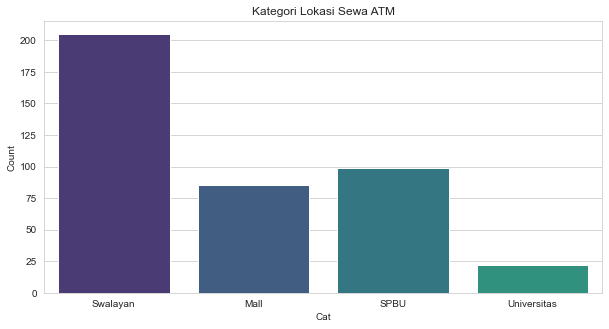

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Cat', y='Count', data=new_df_lokasi)
plt.title('Kategori Lokasi Sewa ATM')

Tempat yang banyak sewa atm adalah swalayan.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 1 to 1247
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tanggal Request        1172 non-null   object        
 1   Nama LOKASI            1247 non-null   object        
 2   KOTA                   1247 non-null   object        
 3   MASA SEWA (TAHUN)      421 non-null    object        
 4   Delivery               1085 non-null   object        
 5   Type                   1141 non-null   object        
 6   Jatuh Tempo Tag 3-4th  1072 non-null   object        
 7   Tag098_No. Inv.        25 non-null     object        
 8   Tag098_Periode         25 non-null     datetime64[ns]
 9   Tag098_JT48            0 non-null      float64       
 10  Tag099_No. Inv.        22 non-null     object        
 11  Tag099_Periode         22 non-null     datetime64[ns]
 12  Tag099_JT48            0 non-null      float64       
 13  Tag

**`KOTA`**

In [45]:
df_kota = df['KOTA'].str.lower()
df_kota

1         jkt-hub ii rpc
2          jkt-hub i rpc
3       jkt-hub viii rpc
4         jkt-hub vi rpc
5            jkt-hub vii
              ...       
1243          yogyakarta
1244             makasar
1245             makasar
1246           pekanbaru
1247           pekanbaru
Name: KOTA, Length: 1247, dtype: object

In [46]:
df_kota.sample(30)

556                solo
177          yogyakarta
1135              jambi
1006            cirebon
814              malang
531         banjarmasin
181        denpasar off
366            karawang
873           jkt-hub v
921          jkt-hub ii
749           samarinda
1121        banjarmasin
481         tasikmalaya
670             bandung
1157      padang cancel
398     jkt-hub ii hold
395           jkt-hub i
809               bogor
471            karawang
190      jkt-hub iv off
425      jkt-hub v hold
836              manado
294            solo off
1246          pekanbaru
949            surabaya
161        magelang rpc
696      jkt-hub xi off
242            surabaya
898          jkt-hub xi
49        bandung relok
Name: KOTA, dtype: object

In [47]:
df_kota.value_counts().head(10)

surabaya       49
jkt-hub i      37
makasar        34
solo           33
yogyakarta     30
cilegon        28
medan          28
bandung        27
bogor          26
jkt-hub vii    22
Name: KOTA, dtype: int64

<AxesSubplot:>

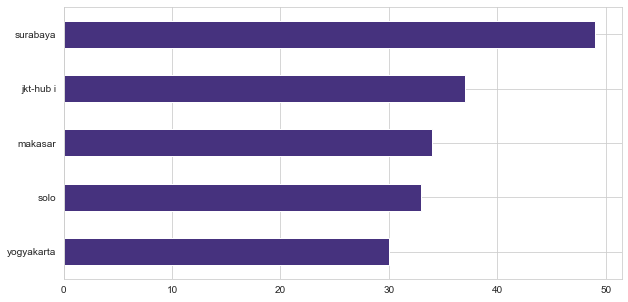

In [48]:
df_kota.value_counts().head(5).sort_values().plot(figsize=(10, 5), kind='barh')

In [49]:
df_kota[df_kota.str.contains('jkt')].value_counts().head(5)

jkt-hub i       37
jkt-hub vii     22
jkt-hub viii    19
jkt-hub v       19
jkt-hub iii     18
Name: KOTA, dtype: int64

In [50]:
df_kota[df_kota.str.contains('jkt')].value_counts().sum()

364

<AxesSubplot:>

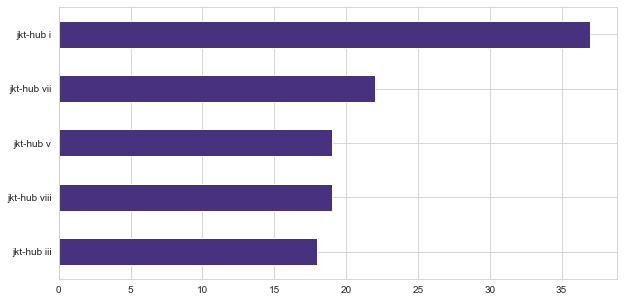

In [51]:
df_kota[df_kota.str.contains('jkt')].value_counts().head(5).sort_values().plot(figsize=(10, 5), kind='barh')

In [52]:
df_kota[df_kota.str.contains('cancel')].value_counts()

bandar lampung cancel    4
jkt-hub vii cancel       3
medan cancel             3
semarang cancel          2
bandung cancel           2
surabaya cancel          2
jkt-hub v cancel         2
solo-cancel              2
jkt-hub i cancel         2
jakarta pusat cancel     2
jkt-hub iii cancel       2
banda aceh-cancel        2
solo cancel              1
padang cancel            1
cirebon cancel           1
batam cancel             1
jkt-hub ix cancel        1
pekanbaru cancel         1
denpasar cancel          1
probolinggo cancel       1
jakarta timur cancel     1
jkt-hub xi cancel        1
makasar cancel           1
sidoarjo cancel          1
jakarta barat cancel     1
manado-cancel            1
jambi cancel             1
Name: KOTA, dtype: int64

In [53]:
df_eda = df[['Nama LOKASI', 'KOTA']]

In [54]:
df_eda[df['KOTA'].str.lower().str.contains('cancel')].sort_values('KOTA')

,Nama LOKASI,KOTA
1120,KK BULOG BANDUNG,BANDUNG CANCEL
800,RS SANTO YUSUP relokasi dari Dago Outlet,BANDUNG CANCEL
1128,KK DISPENDA KEPRI BATAM,BATAM CANCEL
140,Banda Aceh 2,Banda Aceh-cancel
141,Capem simpang surabaya,Banda Aceh-cancel
34,Bandara Raden Inten,Bandar Lampung cancel
35,Teluk Betung,Bandar Lampung cancel
871,RSIA RESTU BUNDA,Bandar Lampung cancel
1217,KK METRO,Bandar Lampung cancel
1131,KCU CIREBON,CIREBON CANCEL


In [55]:
df_eda[df['KOTA'].str.lower().str.contains('rpc')].sort_values('KOTA')

,Nama LOKASI,KOTA
102,Balikpapan Plaza / BLUE SKY HOTEL,BALIKPAPAN rpc
101,BKP Karang Jati,BALIKPAPAN rpc
51,KCU Balikpapan,BALIKPAPAN rpc
157,PLN Balikpapan,BALIKPAPAN rpc
133,Balikpapan Baru,BALIKPAPAN rpc
...,...,...
57,"Fak Hukum UII, Yogya",Yogyakarta Rpc
288,SPBU Adi Sucipto,Yogyakarta Rpc
58,Kampus UII Terpadu Yk,Yogyakarta Rpc
53,KK Kusumanegara / Hotel grand Dafam,Yogyakarta Rpc


In [56]:
df_eda[df['KOTA'].str.lower().str.contains('off')].sort_values('KOTA')

,Nama LOKASI,KOTA
568,GRAND GUCI PASIR KALIKI,BANDUNG OFF
663,RS. BORROMEUS (AREA FOOD COURT),BANDUNG OFF
685,ATM PCI PANBIL MUKA KUNING,BATAM OFF
688,ATM IDM LUCKY PERMAI/PCI PANBIL MUKA KUNING II,BATAM OFF
690,ATM INDOMARET TANJUNG SENGKUANG ( T9M0 ),BATAM OFF
...,...,...
352,Rita Super Mall ttp jan 19 jt jun18,Tegal OFF
349,RS. Mitra Siaga Tegal Des 2017,Tegal OFF
268,Pasific Mall Tegal,Tegal OFF
631,ALFA MART LEMAH DUWUR ttp 19 jan JT sep 18,Tegal OFF


In [57]:
lst1 = ['Cancel', 'RPC', 'OFF']
lst2 = [len(df_eda[df['KOTA'].str.lower().str.contains('cancel')].sort_values('KOTA')),
        len(df_eda[df['KOTA'].str.lower().str.contains('rpc')].sort_values('KOTA')),
        len(df_eda[df['KOTA'].str.lower().str.contains('off')].sort_values('KOTA'))]

In [58]:
df_status = pd.DataFrame()
df_status['Status'] = lst1
df_status['Count'] = lst2

In [59]:
df_status

,Status,Count
0,Cancel,43
1,RPC,156
2,OFF,171


<AxesSubplot:xlabel='Status', ylabel='Count'>

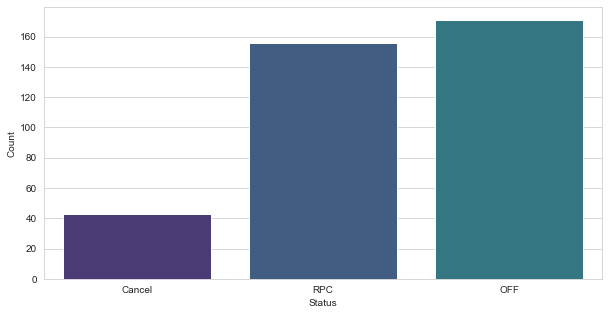

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Status', y='Count', data=df_status)

Bisa dikembangkan lagi untuk insight yang lebih dalam dengan mengkategorikan tiap wilayah kota/provinsi mana yang paling banyak `cancel`, `rpc`, atau `off`.

**`Type`**

Text(0.5, 1.0, 'Top 5 Tipe')

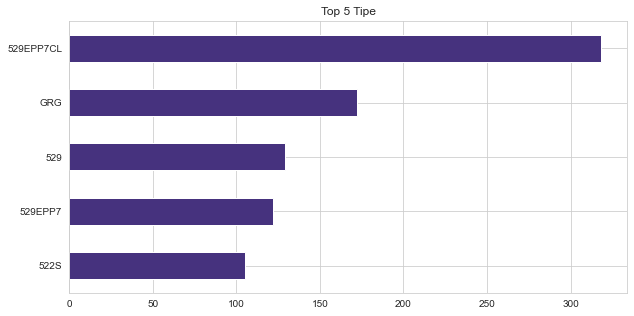

In [61]:
df['Type'].value_counts().head().sort_values().plot(figsize=(10, 5), kind='barh')
plt.title('Top 5 Tipe')

Bisa dikembangkan dengan melihat tipe mana yang paling banyak diminati oleh wilayah tertentu

# #####################################

## Data Aktifitas
#### Data
* File: data-set.xlsx
* Sheetname: Data Aktifitas
* Columns: 14
* Rows: 3662

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

In [63]:
df = pd.read_excel('data-set.xlsx', sheet_name='Data Aktifitas', header=3)
df.head()

,No.,Tanggal,Nomor,ATM ID,Lokasi,Jenis Layanan,Laporan Kerusakan,Pekerjaan Dilakukan,Nomor Tiket,Penggantian Sparepart,Jumlah Part,Status,CSE,Pilihan
0,1.0,16 Juli 2020,88826.0,ATM00001,RUANG UAT DPTI,Error,Hardware,"Check & Clean all devices, replace ..............",2007-100,Hard Disk,1,,M. Yani,NaN
1,2.0,03 Maret 2020,86010.0,ATM120029008,PLN AHMAD YANI,Error,Hardware,"Check & Clean all devices, replace EPP5 & CCA ...",2003-028,CCA Dispenser (CCA Kit Presenter Ctrl.) 49-747...,1,,Hendri Apridzal,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPP5(BSC),LGE,STTL,ENG(AU),QZ1,BLANK,X,I,O",1,,Hendri Apridzal,NaN
3,3.0,02 September 2020,90681.0,ATM120044005,GRAHA ENERGY,PM 1,Preventive Maintenance,"Check & Clean all devices, no replace, test OK.",,,,,ozi medina,NaN
4,4.0,09 September 2020,89466.0,ATM120047014,NaN,Installation,Installation,"Instalasi ATM, Check all devices, test OK.",,,,,M. Yani,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No.                    3171 non-null   float64
 1   Tanggal                3171 non-null   object 
 2   Nomor                  3171 non-null   float64
 3   ATM ID                 3171 non-null   object 
 4   Lokasi                 3027 non-null   object 
 5   Jenis Layanan          3171 non-null   object 
 6   Laporan Kerusakan      3171 non-null   object 
 7   Pekerjaan Dilakukan    3171 non-null   object 
 8   Nomor Tiket            3171 non-null   object 
 9   Penggantian Sparepart  3662 non-null   object 
 10  Jumlah Part            3662 non-null   object 
 11  Status                 3662 non-null   object 
 12  CSE                    3662 non-null   object 
 13  Pilihan                0 non-null      float64
dtypes: float64(3), object(11)
memory usage: 400.7+ KB


**Index**

In [65]:
df.index += 1

In [66]:
df.drop('No.', axis=1, inplace=True)

In [67]:
df.head()

,Tanggal,Nomor,ATM ID,Lokasi,Jenis Layanan,Laporan Kerusakan,Pekerjaan Dilakukan,Nomor Tiket,Penggantian Sparepart,Jumlah Part,Status,CSE,Pilihan
1,16 Juli 2020,88826.0,ATM00001,RUANG UAT DPTI,Error,Hardware,"Check & Clean all devices, replace ..............",2007-100,Hard Disk,1,,M. Yani,NaN
2,03 Maret 2020,86010.0,ATM120029008,PLN AHMAD YANI,Error,Hardware,"Check & Clean all devices, replace EPP5 & CCA ...",2003-028,CCA Dispenser (CCA Kit Presenter Ctrl.) 49-747...,1,,Hendri Apridzal,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPP5(BSC),LGE,STTL,ENG(AU),QZ1,BLANK,X,I,O",1,,Hendri Apridzal,NaN
4,02 September 2020,90681.0,ATM120044005,GRAHA ENERGY,PM 1,Preventive Maintenance,"Check & Clean all devices, no replace, test OK.",,,,,ozi medina,NaN
5,09 September 2020,89466.0,ATM120047014,NaN,Installation,Installation,"Instalasi ATM, Check all devices, test OK.",,,,,M. Yani,NaN


**Memisah tanggal, bulan, dan tahun**

(Untuk visualisasi)

In [68]:
df['Tgl'] = df['Tanggal'].str[:2]
df['Bln'] = df['Tanggal'].str[2:-5]
df['Thn'] = df['Tanggal'].str[-4:]

In [69]:
df_date = df[['Tgl', 'Bln', 'Thn']]
df_date

,Tgl,Bln,Thn
1,16,Juli,2020
2,03,Maret,2020
3,NaN,NaN,NaN
4,02,September,2020
5,09,September,2020
...,...,...,...
3658,01,Juli,2020
3659,09,November,2020
3660,27,Mei,2020
3661,NaN,NaN,NaN


**Tipe data `Nomor` menjadi str**

Asumsi saya adalah `Nomor` merupakan sebuah id, bukan untuk dioperasikan

In [70]:
df['Nomor']

1       88826.0
2       86010.0
3           NaN
4       90681.0
5       89466.0
         ...   
3658    88730.0
3659    90731.0
3660    88655.0
3661        NaN
3662    88642.0
Name: Nomor, Length: 3662, dtype: float64

In [71]:
df['Nomor'].nunique()

3170

In [72]:
df['Nomor'] = df['Nomor'].astype(str)

In [73]:
df['Nomor']

1       88826.0
2       86010.0
3           nan
4       90681.0
5       89466.0
         ...   
3658    88730.0
3659    90731.0
3660    88655.0
3661        nan
3662    88642.0
Name: Nomor, Length: 3662, dtype: object

**`Lokasi`**

In [74]:
df_lokasi = df['Lokasi'].str.upper()
df_lokasi.dropna(inplace=True)

In [75]:
df_lokasi[df_lokasi.str.contains('INDOMARET')]

97          ATM INDOMARET KAPTEN MUSLIM 2 (TO35)
98          ATM INDOMARET KAPTEN MUSLIM 2 (TO35)
99        ATM INDOMARET MANDALA BY PASS 2 (T7ZY)
100                         INDOMARET HARJO SARI
101                   ATM INDOMARET A.H NASUTION
                          ...                   
3615    ATM INDOMARET POINT RUNGKUT MADYA (TWCL)
3616    ATM INDOMARET POINT RUNGKUT MADYA (TWCL)
3617    ATM INDOMARET POINT RUNGKUT MADYA (TWCL)
3618       ATM INDOMARET PLUS MULYOSARI 2 (T4LR)
3619       ATM INDOMARET PLUS MULYOSARI 2 (T4LR)
Name: Lokasi, Length: 252, dtype: object

In [76]:
df_lokasi[df_lokasi.str.contains('ALFA MART')]

423                ALFA MART KEBAK  KRAMAT
424                ALFA MART KEBAK  KRAMAT
425                 ALFA MART ADISUMARMO 2
690                   ALFA MART DAENG TATA
1484    ALFA MART PURI ANJASMORO  RAYA  26
1485    ALFA MART PURI ANJASMORO  RAYA  26
2632                ALFA MART PASAR WISATA
2633                ALFA MART PASAR WISATA
2993                ALFA MART KEMANG UTARA
2994                ALFA MART KEMANG UTARA
2995                ALFA MART KEMANG UTARA
2996                ALFA MART KEMANG UTARA
3127              ALFA MART RC. VETERAN  2
3248              ALFA MART JATIWARINGIN 4
3249              ALFA MART JATIWARINGIN 4
3334               ALFA MART PULO GEBANG 4
3335               ALFA MART PULO GEBANG 4
Name: Lokasi, dtype: object

In [77]:
df_lokasi[df_lokasi.str.contains('SWALAYAN')]

1106                   ANUGRAH SWALAYAN
1107                   ANUGRAH SWALAYAN
2221    SWALAYAN GRANDMART TANJUNG RAYA
2222    SWALAYAN GRANDMART TANJUNG RAYA
2223    SWALAYAN GRANDMART TANJUNG RAYA
2224    SWALAYAN GRANDMART TANJUNG RAYA
2225    SWALAYAN GRANDMART TANJUNG RAYA
2226    SWALAYAN GRANDMART TANJUNG RAYA
2612                    SWALAYAN BENTAR
2613                    SWALAYAN BENTAR
2614                    SWALAYAN BENTAR
2615                    SWALAYAN BENTAR
3647             BSB SWALAYAN AL HIKMAH
Name: Lokasi, dtype: object

In [78]:
df_lokasi[df_lokasi.str.contains('TIP TOP')]

3118         TIP TOP CIPUTAT
3160    TIP TOP PONDOK BAMBU
3303     TIP TOP  RAWAMANGUN
Name: Lokasi, dtype: object

In [79]:
df_lokasi[df_lokasi.str.contains('SPBU')]

132              SPBU KHATIB SULAIMAN
133              SPBU KHATIB SULAIMAN
134              SPBU KHATIB SULAIMAN
135              SPBU KHATIB SULAIMAN
138              SPBU KHATIB SULAIMAN
                    ...              
3470    SPBU 34-17514 MM2100 CIBITUNG
3471    SPBU 34-17514 MM2100 CIBITUNG
3472    SPBU 34-17514 MM2100 CIBITUNG
3473    SPBU 34-17514 MM2100 CIBITUNG
3493               SPBU COCO CIKARANG
Name: Lokasi, Length: 220, dtype: object

In [80]:
lst_swalayan = []
lst_swalayan_cat = ['INDOMARET', 'MART', 'SWALAYAN', 'TIP TOP']

for i in lst_swalayan_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_swalayan.append(x)

len_swalayan = len(lst_swalayan)

In [81]:
lst_spbu = []
lst_spbu_cat = ['SPBU']

for i in lst_spbu_cat:
    for x in list(df_lokasi[df_lokasi.str.contains(i)]):
        lst_spbu.append(x)

len_spbu = len(lst_spbu)

In [82]:
lst1 = ['SWALAYAN', 'SPBU']
lst2 = [len_swalayan, len_spbu]

df_viz = pd.DataFrame()
df_viz['Cat'] = lst1
df_viz['Count'] = lst2

In [83]:
df_viz['Count']

0    429
1    220
Name: Count, dtype: int64

Text(0.5, 1.0, 'Aktifitas ATM di Swalayan dan SPBU')

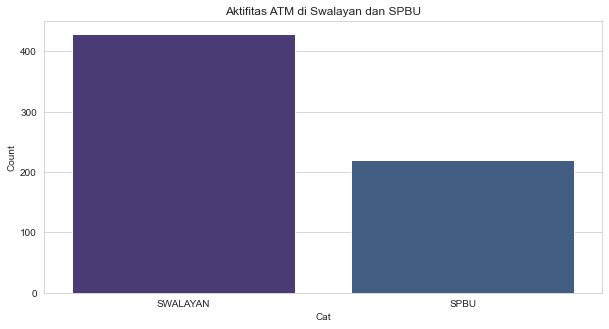

In [84]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Cat', y='Count', data=df_viz)
plt.title('Aktifitas ATM di Swalayan dan SPBU')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 1 to 3662
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tanggal                3171 non-null   object 
 1   Nomor                  3662 non-null   object 
 2   ATM ID                 3171 non-null   object 
 3   Lokasi                 3027 non-null   object 
 4   Jenis Layanan          3171 non-null   object 
 5   Laporan Kerusakan      3171 non-null   object 
 6   Pekerjaan Dilakukan    3171 non-null   object 
 7   Nomor Tiket            3171 non-null   object 
 8   Penggantian Sparepart  3662 non-null   object 
 9   Jumlah Part            3662 non-null   object 
 10  Status                 3662 non-null   object 
 11  CSE                    3662 non-null   object 
 12  Pilihan                0 non-null      float64
 13  Tgl                    3171 non-null   object 
 14  Bln                    3171 non-null   object 
 15  Thn 

<AxesSubplot:>

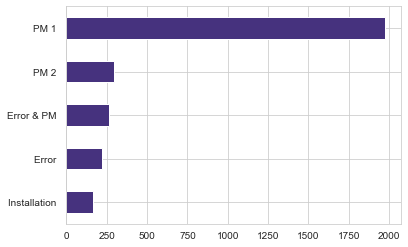

In [88]:
df['Jenis Layanan'].value_counts().head().sort_values().plot(kind='barh')

<AxesSubplot:>

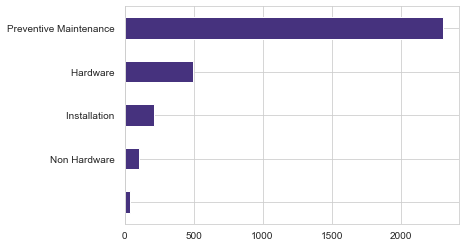

In [89]:
df['Laporan Kerusakan'].value_counts().head().sort_values().plot(kind='barh')